# Combine Connectivity Matrices (HCP Shine 1 Session 1 CleanGSR  + NKI 1400 HY CompCorGSR, BNA)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [2]:
%matplotlib inline

In [3]:
sns.set_context('notebook')

### HCP

In [4]:
hcp_zmat_mean = np.genfromtxt('/home/despo/dlurie/Projects/timescale_hierarchy/results/functional_connectivity/HCP_Shine1_Session1_CleanGSR_BNA_zmat_mean.csv')

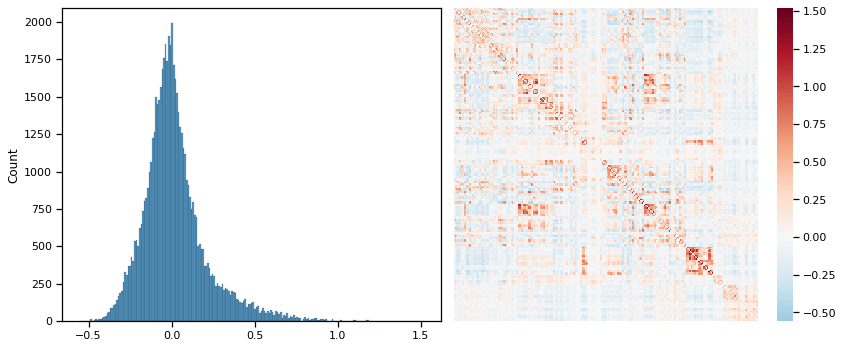

In [5]:
f, axes = plt.subplots(1,2, figsize=(12,5))
sns.heatmap(hcp_zmat_mean, yticklabels=False, xticklabels=False, ax=axes[1], cmap='RdBu_r', center=0)
sns.histplot(hcp_zmat_mean.flatten(), ax=axes[0])
plt.tight_layout()

### NKI

In [6]:
nki_zmat_mean = np.genfromtxt('/home/despo/dlurie/Projects/timescale_hierarchy/results/functional_connectivity/NKI-1400_HY_CompCorGSR_BNA_zmat_mean.csv')

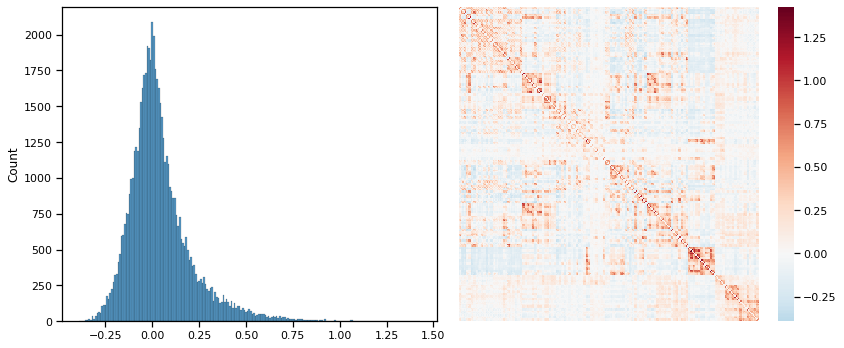

In [7]:
f, axes = plt.subplots(1,2, figsize=(12,5))
sns.heatmap(nki_zmat_mean, yticklabels=False, xticklabels=False, ax=axes[1], cmap='RdBu_r', center=0)
sns.histplot(nki_zmat_mean.flatten(), ax=axes[0])
plt.tight_layout()

### Combine Matrices

In [8]:
combined_mat = (nki_zmat_mean + hcp_zmat_mean)/2

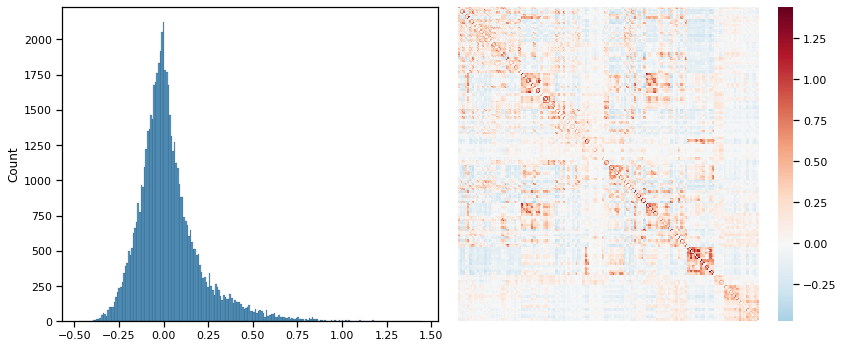

In [9]:
f, axes = plt.subplots(1,2, figsize=(12,5))
sns.heatmap(combined_mat, yticklabels=False, xticklabels=False, ax=axes[1], cmap='RdBu_r', center=0)
sns.histplot(combined_mat.flatten(), ax=axes[0])
plt.tight_layout()

### Save combined matrix

In [10]:
np.savetxt('/home/despoB/dlurie/Projects/timescale_hierarchy/results/functional_connectivity/Combined_HCP-Shine1_Session1_CleanGSR_NKI-1400-HY-CompCorGSR_BNA_zmat_mean.tsv', combined_mat, delimiter='\t')

### Create and save positive-only matrix

In [11]:
combined_mat_po = combined_mat.copy()

In [12]:
combined_mat_po[combined_mat_po < 0] = 0

/home/despoB/dlurie/anaconda3/envs/playpen/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


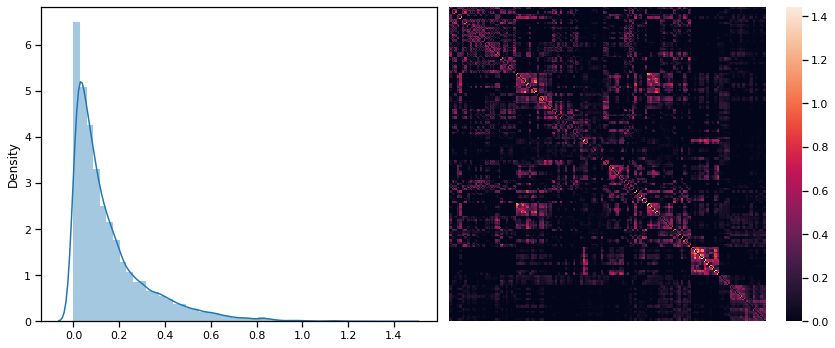

In [13]:
f, axes = plt.subplots(1,2, figsize=(12,5))
sns.heatmap(combined_mat_po, yticklabels=False, xticklabels=False, ax=axes[1])
sns.distplot(combined_mat_po.flatten()[combined_mat_po.flatten() > 0], ax=axes[0])
plt.tight_layout()

In [14]:
np.savetxt('/home/despoB/dlurie/Projects/timescale_hierarchy/results/functional_connectivity/Combined_HCP-Shine1_Session1_CleanGSR_NKI-1400-HY-CompCorGSR_BNA_zmat_mean_po.tsv', combined_mat_po, delimiter='\t')